### Логистическая регрессия

#### Цель работы

Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.

#### Содержание работы

1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием `make_classification` из библиотеки `sklearn.datasets`. Число классов возьмите равным двум.
2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
3. Оценить качество построенной модели, используя метрики accuracy и F1-score.
4. Реализовать модель логистической регрессии `LogisticRegression` из библиотеки `sklearn.linear_model` и оценить качество построенной модели, используя метрики accuracy и F1-score.
5. Сравнить результаты двух реализаций.

#### 1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием `make_classification` из библиотеки `sklearn.datasets`. Число классов возьмите равным двум.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [33]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


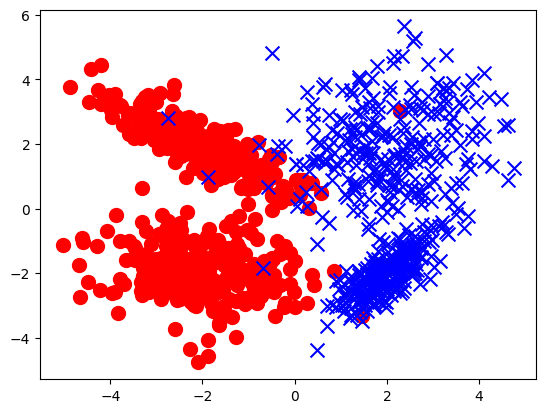

In [34]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

#### 2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.

In [38]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X_with_bias.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X_with_bias, y, start_b, self._n_iters)

In [41]:
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X): # функция предсказания значения сигмоиды - вероятность отнесения данного объекта к полоительному классу
        # X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X, self.b)
    
    def predict(self, X): # точное предсказание
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        y_pred = self.predict_proba(X_with_bias) > 0.5
        return y_pred

In [42]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

#### 3. Оценить качество построенной модели, используя метрики accuracy и F1-score.

accuracy = 0.98 F1-score = 0.98


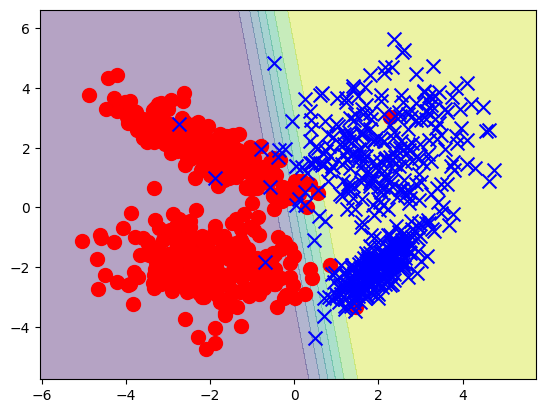

In [44]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred_proba = logreg.predict_proba(X_with_bias)
xx, yy = np.meshgrid(
    np.arange(X_with_bias.min(axis=0)[1]-1, X_with_bias.max(axis=0)[1]+1, 0.01), 
    np.arange(X_with_bias.min(axis=0)[2]-1, X_with_bias.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_with_bias[:, 1][y==0], X_with_bias[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X_with_bias[:, 1][y==1], X_with_bias[:, 2][y==1], marker="x", c='b', s=100)

#### 4. Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.

In [45]:
from sklearn.linear_model import LogisticRegression
sklearn_model_logreg = LogisticRegression()
sklearn_model_logreg.fit(X, y)
y_pred_lr = sklearn_model_logreg.predict(X)

In [46]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


accuracy = 0.98 F1-score = 0.98


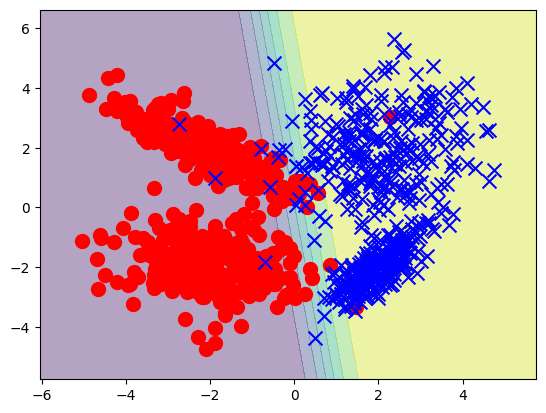

In [55]:
ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'accuracy = {ac_lr:.2f} F1-score = {f1_lr:.2f}')

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01), 
    np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01))

XX = np.c_[xx.ravel(), yy.ravel()] 

Z_lr = sklearn_model_logreg.predict_proba(XX)[:, 1]
Z_lr = Z_lr.reshape(xx.shape)
plt.contourf(xx, yy, Z_lr, alpha=0.4)
plt.scatter(X[y==0, 0], X[y==0, 1], marker="o", c='r', s=100)
plt.scatter(X[y==1, 0], X[y==1, 1], marker="x", c='b', s=100)

#### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [60]:
learning_rates = [0.01, 0.1, 0.5, 1, 2, 3, 50, 93, 150, 200, 320, 10000, 32432432423432423]
for learning_rate in learning_rates:
    model = LogReg(alpha=learning_rate)
    try:
        model.fit(X, y)
        y_pred = model.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
        print(f"Модель обучена с alpha={learning_rate}")
    except Exception as e:
        print(f"Ошибка при обучении с alpha={learning_rate}: {e}")

accuracy = 0.97 F1-score = 0.97
Модель обучена с alpha=0.01
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=0.1
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=0.5
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=1
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=2
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=3
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=50


/tmp/ipykernel_93681/2056011823.py:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/tmp/ipykernel_93681/2056011823.py:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/tmp/ipykernel_93681/2056011823.py:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/tmp/ipykernel_93681/2056011823.py:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/tmp/ipykernel_93681/2056011823.py:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=93
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=150
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=200
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=320
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=10000
accuracy = 0.98 F1-score = 0.98
Модель обучена с alpha=32432432423432423


/tmp/ipykernel_93681/2056011823.py:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


#### 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

0.7269155206286837


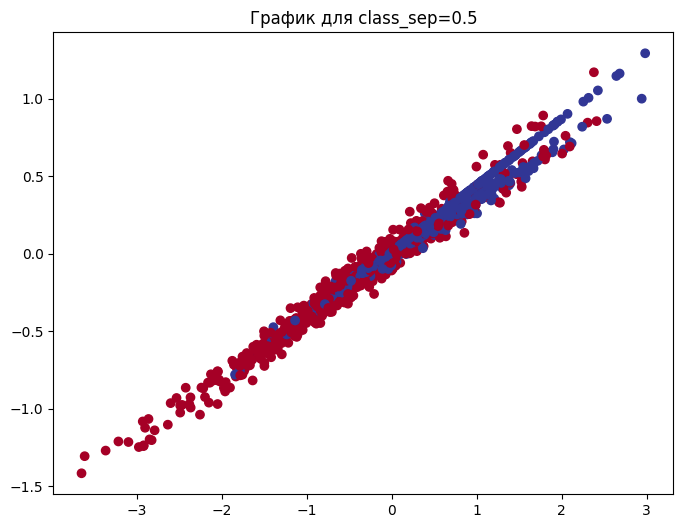

0.8591408591408591


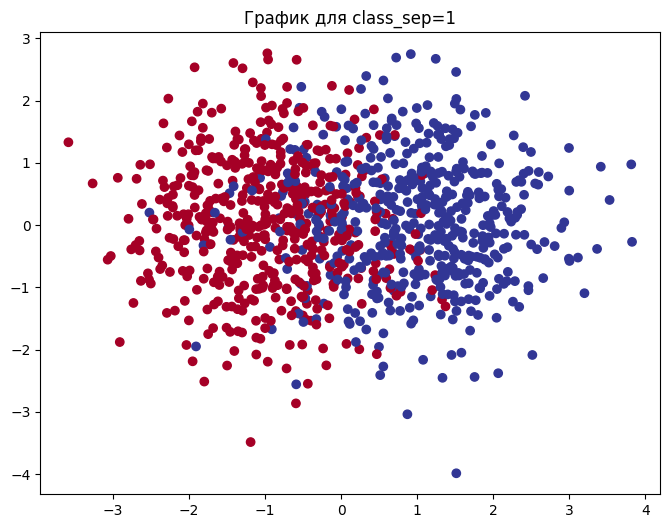

0.9841269841269841


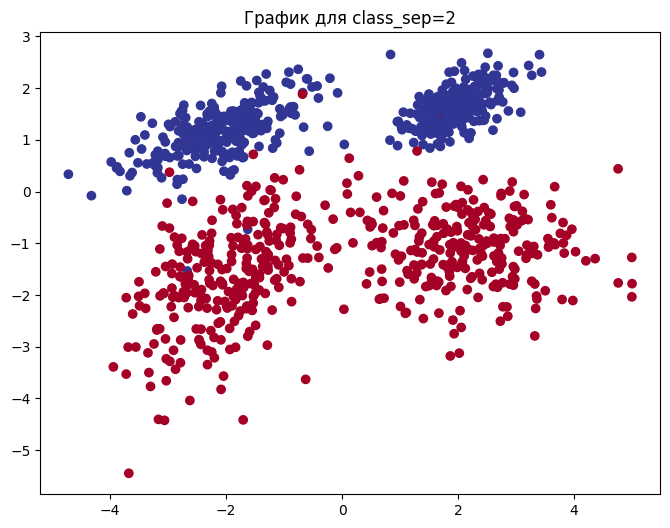

0.9910269192422732


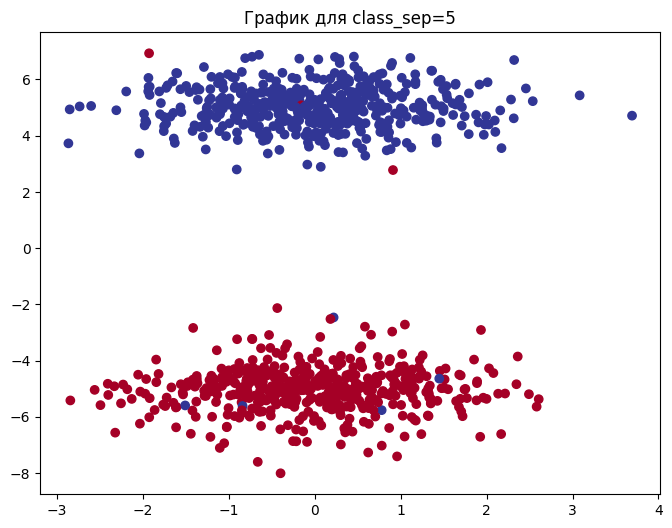

In [61]:
class_sep_values = [0.5, 1, 2, 5]
for class_sep in class_sep_values:
    X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_classes=2, class_sep=class_sep)
    
    model = LogReg(alpha=0.1)
    model.fit(X, y)

    print(f1_score(y, model.predict(X)))
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(f'График для class_sep={class_sep}')
    plt.show()

#### 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [62]:
X, y = make_classification(n_samples=1000, n_features=100, n_informative=50, n_classes=2)
model = LogReg(alpha=0.1)
model.fit(X, y)
f1_score(y, model.predict(X))

0.8093841642228738

#### 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [63]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=4, n_classes=3, random_state=42)

model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X, y)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [64]:
y_pred = model_ova.predict(X)
y_proba = model_ova.predict_proba(X)  
print("Предсказанные вероятности для первых 5 объектов:")
print(y_proba[:5])

Предсказанные вероятности для первых 5 объектов:
[[0.63531564 0.16295245 0.2017319 ]
 [0.19960072 0.49920255 0.30119673]
 [0.0518592  0.34797938 0.60016142]
 [0.30216656 0.10689178 0.59094166]
 [0.14310118 0.63259989 0.22429893]]



#### 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [65]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)
clf.predict_proba(X)

array([[0.64046978, 0.14456958, 0.21496064],
       [0.17442462, 0.47928886, 0.34628653],
       [0.0553797 , 0.33170698, 0.61291332],
       ...,
       [0.02206334, 0.88219714, 0.09573952],
       [0.03791306, 0.74605846, 0.21602848],
       [0.70698491, 0.00905079, 0.28396429]], shape=(1000, 3))